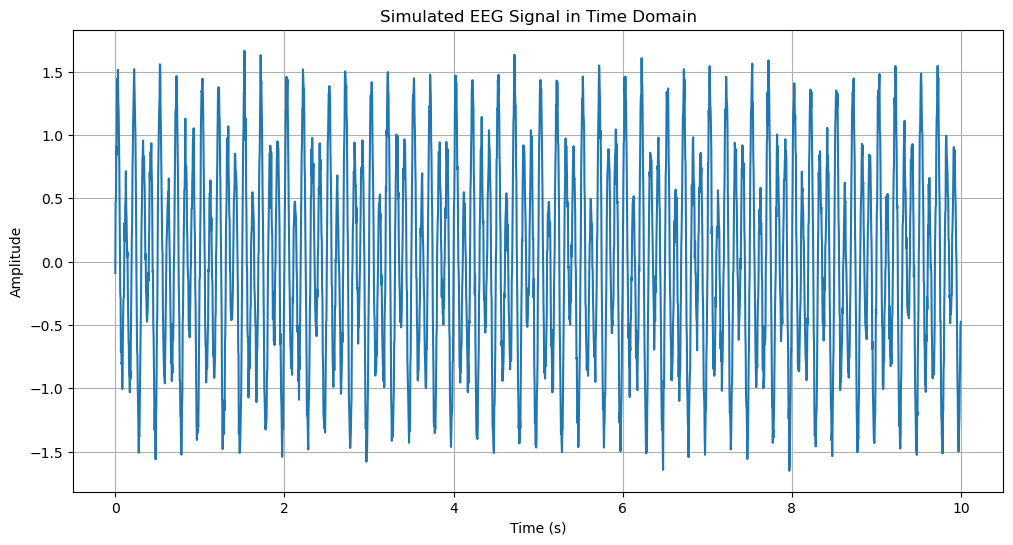

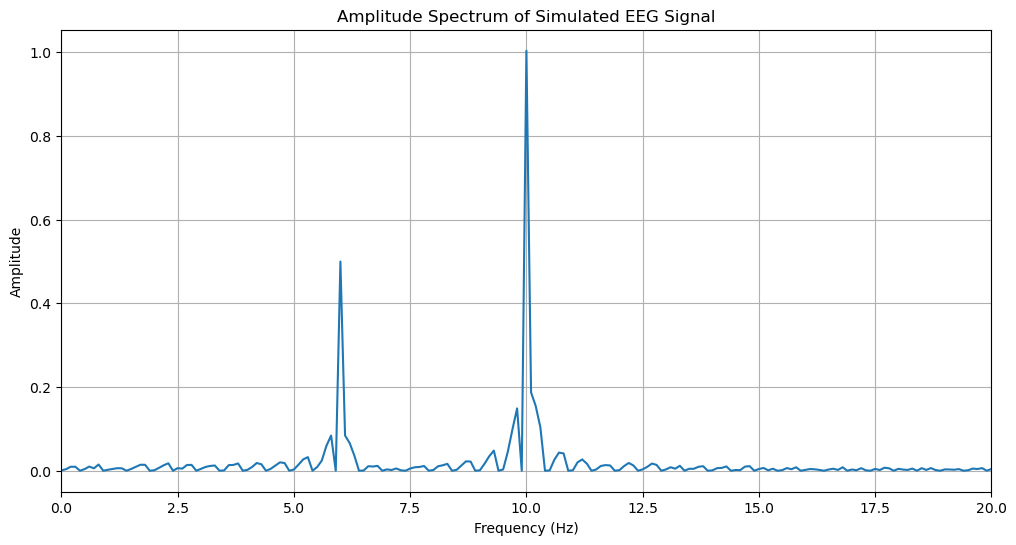

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(P):
    """Compute the Fast Fourier Transform (FFT) of a complex-valued signal."""
    n = len(P)
    if n == 1:
        return P

    omega = np.exp(-2j * np.pi / n)
    P_e = FFT(P[0::2])
    P_o = FFT(P[1::2])
    y = np.zeros(n, dtype=complex)

    for j in range(n // 2):
        y[j] = P_e[j] + omega**j * P_o[j]
        y[j + n // 2] = P_e[j] - omega**j * P_o[j]

    return y

# 设置采样频率和信号持续时间
Fs = 256  # 采样频率 (Hz)
T = 10    # 信号持续时间 (秒)
N = T * Fs  # 采样点数

# 时间向量
t = np.arange(N) / Fs

# 生成包含α波（8-12 Hz）和θ波（4-8 Hz）的模拟信号
alpha_wave = np.sin(2 * np.pi * 10 * t)  # α波，10 Hz
theta_wave = 0.5 * np.sin(2 * np.pi * 6 * t)  # θ波，6 Hz

# 模拟EEG信号
eeg_signal = alpha_wave + theta_wave + 0.1 * np.random.randn(N)  # 加入少量随机噪声

# 绘制模拟EEG信号的时域图
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_signal)
plt.title('Simulated EEG Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 计算FFT
# F = np.fft.fft(eeg_signal)
F = FFT(eeg_signal)

# 频率向量
freq = np.fft.fftfreq(N, 1/Fs)

# 归一化幅度谱
F_abs = np.abs(F) / N

# 绘制模拟EEG信号的频域图
plt.figure(figsize=(12, 6))
plt.plot(freq[:N//2], F_abs[:N//2]*2)  # 乘以2是因为我们只取了正频率部分
plt.title('Amplitude Spectrum of Simulated EEG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)  # 只显示0到20Hz范围
plt.grid(True)
plt.show()
